# Loading The Necessary Packages and Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [2]:
import hashlib  # Used to generate and compare unique hash values (useful for detecting duplicate images)
from collections import defaultdict  # Efficient default dictionary structure for grouping and counting
import matplotlib.pyplot as plt  # Data visualization - plotting basic charts
import seaborn as sns  # Advanced statistical data visualization
from PIL import Image  # Image processing: opening, manipulating, and saving images
import cv2  # OpenCV library: powerful image and video processing
import tensorflow as tf  # TensorFlow core framework for deep learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Image preprocessing utility in Keras (part of TensorFlow), supports augmentation

2025-05-07 21:55:38.711372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746654938.934846      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746654939.020700      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Dataset Loading : Path Setup

In [3]:
# Defining the path to the training and test data directory
train_data_dir = os.path.join('/kaggle/input/drowsy-detection-dataset/Drowsy_datset/train')
test_data_dir = os.path.join('/kaggle/input/drowsy-detection-dataset/Drowsy_datset/test')

# Listing all subdirectories (classes) or files present in the training and test folder
training_files = os.listdir(train_data_dir)
testing_files = os.listdir(test_data_dir)

In [4]:
print("Training data path :", train_data_dir)
print("Testing data path :", test_data_dir)
print("Train files :", training_files)
print("Test files :", testing_files)

Training data path : /kaggle/input/drowsy-detection-dataset/Drowsy_datset/train
Testing data path : /kaggle/input/drowsy-detection-dataset/Drowsy_datset/test
Train files : ['DROWSY', 'NATURAL']
Test files : ['DROWSY', 'NATURAL']


In [5]:
train_drowsy_image_path = os.path.join(train_data_dir , 'DROWSY')
train_natural_image_path = os.path.join(train_data_dir, 'NATURAL')
train_drowsy_images= os.listdir(train_drowsy_image_path)
train_natural_images= os.listdir(train_natural_image_path)

test_drowsy_image_path = os.path.join(test_data_dir , 'DROWSY')
test_natural_image_path = os.path.join(test_data_dir, 'NATURAL')
test_drowsy_images= os.listdir(test_drowsy_image_path)
test_natural_images= os.listdir(test_natural_image_path)

print(f" Number of files in the training dataset as per class")
print(f" No of image files in the DROWSY train folder : {len(train_drowsy_images)}")
print(f" No of image files in the NATURAL test folder : {len(train_natural_images)} ")
print("\n Number of files in the testing dataset as per class ")
print(f" No of image files in the DROWSY train folder : {len(test_drowsy_images)}")
print(f" No of image files in the NATURAL test folder : {len(test_natural_images)} ")

 Number of files in the training dataset as per class
 No of image files in the DROWSY train folder : 2809
 No of image files in the NATURAL test folder : 3050 

 Number of files in the testing dataset as per class 
 No of image files in the DROWSY train folder : 757
 No of image files in the NATURAL test folder : 726 


# Copy Dataset to Working Directory (Kaggle)


In [6]:
import shutil

# Copy the entire dataset folder from the input directory to the working directory
shutil.copytree('/kaggle/input/drowsy-detection-dataset/Drowsy_datset', 
                '/kaggle/working/Drowsy_datset', dirs_exist_ok=True)

# Defining new path for training and testing data inside the working directory
train_path = '/kaggle/working/Drowsy_datset/train'
test_path = '/kaggle/working/Drowsy_datset/test'

# Identifying and Deleting Duplicate Images

In [7]:
def get_md5(filepath):
    with open(filepath, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

def remove_duplicates(folder_path):
    hash_map = defaultdict(list)
    total_removed = 0

    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue

        for filename in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, filename)
            try:
                file_hash = get_md5(file_path)
                hash_map[file_hash].append(file_path)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

    for duplicates in hash_map.values():
        if len(duplicates) > 1:
            for dup in duplicates[1:]:  # Keep first
                try:
                    os.remove(dup)
                    print(f"Deleted: {dup}")
                    total_removed += 1
                except Exception as e:
                    print(f"Could not delete {dup}: {e}")

    print(f"✅ Deleted {total_removed} duplicate images.")

# Call on copied folders
remove_duplicates(train_path)

Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1938.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1540.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1893.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1919.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1543.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1427.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1545.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1910.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1450.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1989.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1952.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/2048.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1986.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/2051.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/2020.png
Deleted: /kaggle/working/Drowsy_datset/train/DROWSY/1896.png
Deleted: /kaggle/working

In [8]:
train_drowsy_image_path = os.path.join(train_path, 'DROWSY')
train_natural_image_path = os.path.join(train_path, 'NATURAL')
train_drowsy_images= os.listdir(train_drowsy_image_path)
train_natural_images= os.listdir(train_natural_image_path)

print(f" Number of files in the training dataset as per class")
print(f" No of image files in the DROWSY train folder : {len(train_drowsy_images)}")
print(f" No of image files in the NATURAL test folder : {len(train_natural_images)} ")

 Number of files in the training dataset as per class
 No of image files in the DROWSY train folder : 2613
 No of image files in the NATURAL test folder : 3045 


# Bar Chart to Display No.of Images in each Category

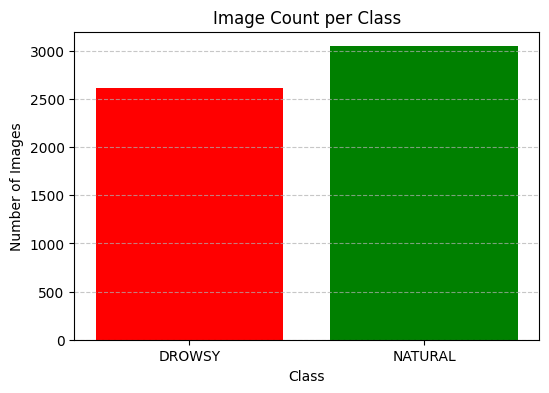

In [9]:
# Count images in each subfolder (class)
class_counts = {}
for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)
    if os.path.isdir(class_folder):
        image_count = len(os.listdir(class_folder))
        class_counts[class_name.upper()] = image_count  # Capitalize for display

# Plotting
plt.figure(figsize=(6,4))
plt.bar(class_counts.keys(), class_counts.values(), color=['red', 'green'])
plt.title('Image Count per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Displaying few sample images from Dataset

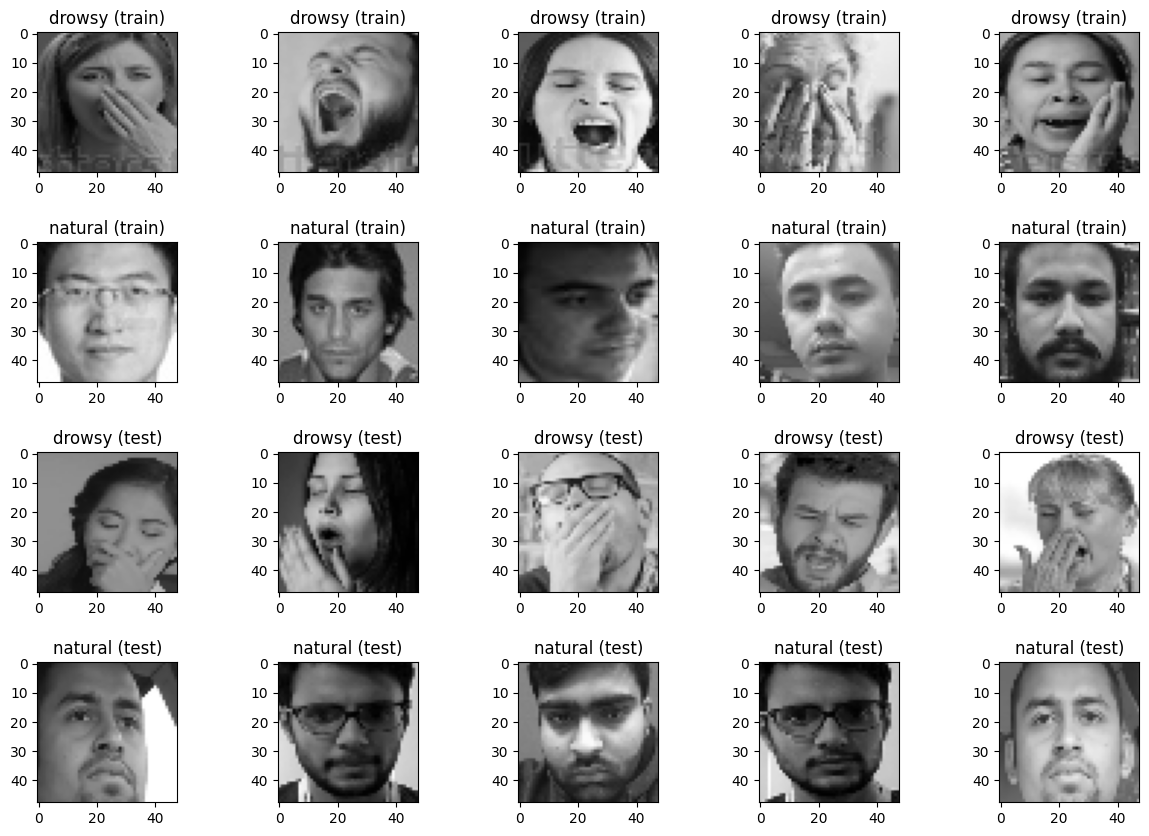

In [10]:
fig, axes = plt.subplots(4, 5, figsize=(15, 10))

for i, axes in enumerate(axes.flat):
    if i < 5:
        img = cv2.imread(os.path.join(train_drowsy_image_path, train_drowsy_images[i]))
        axes.imshow(img)
        axes.set_title('drowsy (train)')
    if i > 4 and i < 10:
        img = cv2.imread(os.path.join(train_natural_image_path, train_natural_images[i]))
        axes.imshow(img)
        axes.set_title('natural (train)')
    if i > 9 and i < 15:
        img = cv2.imread(os.path.join(test_drowsy_image_path, test_drowsy_images[i]))
        axes.imshow(img)
        axes.set_title('drowsy (test)')
    if i > 14 and i < 20:
        img = cv2.imread(os.path.join(test_natural_image_path, test_natural_images[i]))
        axes.imshow(img)
        axes.set_title('natural (test)')
plt.subplots_adjust(hspace=0.5)
plt.show()

#

# Splitting the Data

In [11]:
data_generator = ImageDataGenerator(
    rescale = 1./255.0,                   # Normalize pixel values to [0, 1]
    validation_split = 0.2,               # Reserve 20% of data for validation
    rotation_range=20,                    # Randomly rotate images up to 20 degrees
    width_shift_range=0.2,                # Random horizontal shift
    height_shift_range=0.2,               # Random vertical shift
    shear_range=0.2,                      # Shearing transformation
    zoom_range=0.2,                       # Random zoom within range
    horizontal_flip=True,                 # Randomly flip images horizontally
    fill_mode='nearest'                   # Fill in pixels after transformation
)

test_data_generator = ImageDataGenerator(
    rescale= 1./255.0,
)

# Training data generator: loads images from the 'train' folder (80% of total)
train_data_gen = data_generator.flow_from_directory(
    train_path,
    target_size=(224,224),
    class_mode='binary',
    batch_size= 32,
    subset='training',
    shuffle=True
)

# Validation data generator: loads the remaining 20% of training images
val_data_gen = data_generator.flow_from_directory(
    train_path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    subset='validation',       # Use validation subset
    shuffle=True
)

# Test data generator: loads images from the test folder
test_data_gen = test_data_generator.flow_from_directory(
    test_path,
    target_size = (224,224),
    class_mode = 'binary',
    batch_size = 32,
    shuffle=True
)

Found 4527 images belonging to 2 classes.
Found 1131 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.


# Displaying Data Samples and Adding Labels to both Classes

In [12]:
print(f" training data samples :  {train_data_gen.samples} {train_data_gen.class_indices}")
print(f" testing data samples : {test_data_gen.samples} {test_data_gen.class_indices}")

 training data samples :  4527 {'DROWSY': 0, 'NATURAL': 1}
 testing data samples : 1483 {'DROWSY': 0, 'NATURAL': 1}


# CNN Model for Drowsiness Classification

In [13]:
# Import required modules from Keras
from tensorflow.keras import models
from tensorflow.keras import layers

# Build a sequential CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),  # Convolutional layer: 32 filters of size 3x3, ReLU activation
    layers.MaxPool2D((2,2)),    # Max pooling layer: reduces spatial dimensions by 2

    layers.Flatten(),    # Flatten the 2D feature maps into a 1D vector

    layers.Dense(64, activation='relu'), # Fully connected (dense) layer with 64 units and ReLU activation

    layers.Dense(1, activation='sigmoid') # Output layer for binary classification: 1 neuron with sigmoid activation
])

model.compile(optimizer='adam',             # Optimizer: Adam (adaptive learning rate)
              loss='binary_crossentropy',   # Loss: Binary cross-entropy for binary output
              metrics=['accuracy'])         # Track accuracy during training

# Print model architecture summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-07 21:56:49.912526: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      25,233,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,234,433 (96.26 MB)

 Trainable params: 25,234,433 (96.26 MB)

 Non-trainable params: 0 (0.00 B)

# Train the CNN Model on Image Data

In [14]:
# Fit the model using the training and validation generators
history = model.fit(
    train_data_gen, # Generator for training data (with augmentation)
    steps_per_epoch= train_data_gen.samples // train_data_gen.batch_size,  # Number of batches per training epoch
    epochs=10, # Total number of training epochs
    validation_data = val_data_gen,  # Generator for validation data
    validation_steps = val_data_gen.samples // val_data_gen.batch_size   # Validation batches per epoch
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 125s 858ms/step - accuracy: 0.5788 - loss: 2.5604 - val_accuracy: 0.5330 - val_loss: 0.7510
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.6562 - loss: 0.5667 - val_accuracy: 0.6364 - val_loss: 0.6438
Epoch 3/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


141/141 ━━━━━━━━━━━━━━━━━━━━ 121s 848ms/step - accuracy: 0.7301 - loss: 0.5566 - val_accuracy: 0.5036 - val_loss: 0.8661
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.6875 - loss: 0.5271 - val_accuracy: 0.6364 - val_loss: 0.7751
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 122s 848ms/step - accuracy: 0.7540 - loss: 0.5098 - val_accuracy: 0.5857 - val_loss: 0.7883
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5625 - loss: 0.7920 - val_accuracy: 0.6364 - val_loss: 0.5370
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 121s 844ms/step - accuracy: 0.7605 - loss: 0.4976 - val_accuracy: 0.6045 - val_loss: 0.7109
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8438 - loss: 0.4439 - val_accuracy: 0.6364 - val_loss: 0.6546
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 124s 864ms/step - accuracy: 0.7686 - loss: 0.4831 - val_accuracy: 0.6098 - val_loss: 0.7571
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8438 - loss: 0.4796 - val_

# Plot Training vs Validation Loss Over Epochs

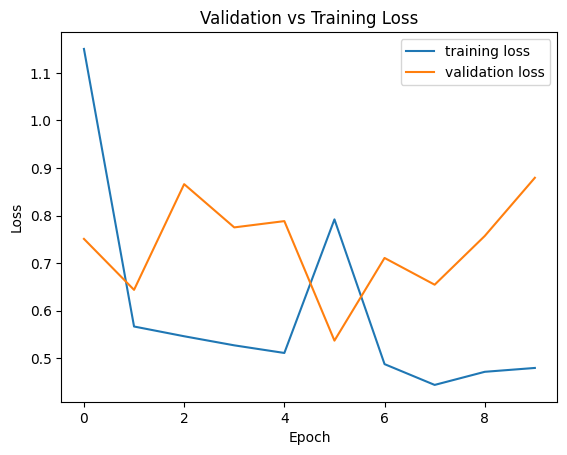

In [15]:
plt.plot(history.history['loss'], label='training loss')    # Training loss per epoch
plt.plot(history.history['val_loss'], label='validation loss')  # Validation loss per epoch
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation vs Training Loss')
plt.legend()
plt.show()   # Display the plot

# Plot Training vs Validation Accuracy Over Epochs

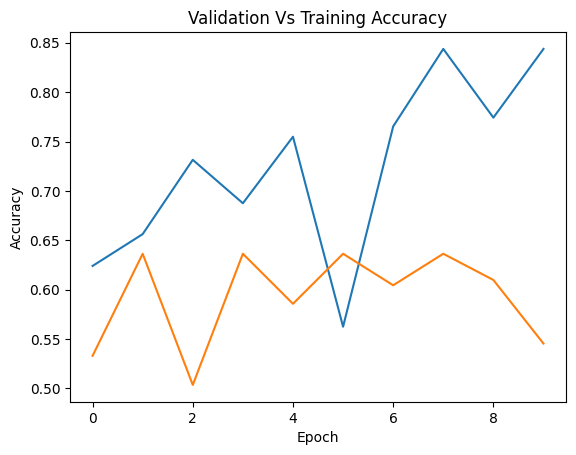

In [16]:
plt.plot(history.history['accuracy'], label='validation accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='validation accuracy') # Validation accuracy over epochs
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Validation Vs Training Accuracy")
plt.show()  # Display the plot

# 🛑 Add EarlyStopping Callback to Training

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Stop training if validation loss doesn't improve for 3 consecutive epochs
early_stop = EarlyStopping(
    monitor='val_loss',       # What to monitor (can also be 'val_accuracy')
    patience=3,               # Number of epochs with no improvement to wait
    restore_best_weights=True  # Restore the best model weights seen during training
)

# Train the model with EarlyStopping
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // train_data_gen.batch_size,
    epochs=20,  # You can still set a higher max epoch
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // val_data_gen.batch_size,
    callbacks=[early_stop]  # EarlyStopping
)


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 123s 861ms/step - accuracy: 0.7645 - loss: 0.4959 - val_accuracy: 0.5688 - val_loss: 0.8299
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.7812 - loss: 0.5545 - val_accuracy: 0.8182 - val_loss: 0.4531
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 123s 857ms/step - accuracy: 0.7869 - loss: 0.4482 - val_accuracy: 0.6223 - val_loss: 0.7468
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.8438 - loss: 0.4291 - val_accuracy: 0.5455 - val_loss: 0.8805
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 122s 851ms/step - accuracy: 0.7971 - loss: 0.4331 - val_accuracy: 0.6295 - val_loss: 0.6934


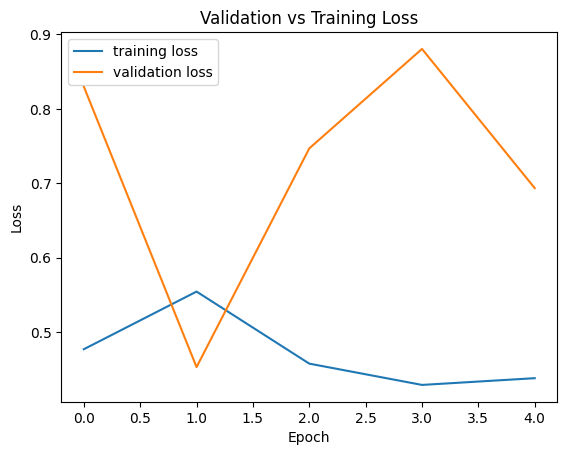

In [18]:
plt.plot(history.history['loss'], label='training loss')    # Training loss per epoch
plt.plot(history.history['val_loss'], label='validation loss')  # Validation loss per epoch
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation vs Training Loss')
plt.legend()
plt.show()   # Display the plot

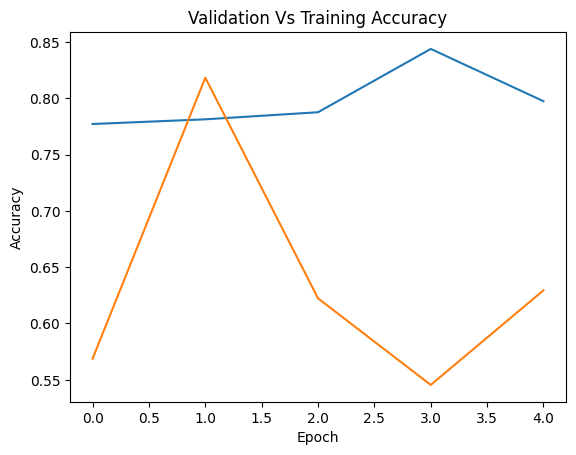

In [19]:
plt.plot(history.history['accuracy'], label='validation accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='validation accuracy') # Validation accuracy over epochs
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Validation Vs Training Accuracy")
plt.show()  # Display the plot

# Evaluate the trained model using the test dataset

In [20]:
# Evaluate the trained model using the test dataset
loss , accuracy = model.evaluate(test_data_gen)

47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.7966 - loss: 0.5257


# Prepare Test Data Generator

In [21]:
test_data = test_data_generator.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False       # Disable shuffling for accurate label-prediction alignment
)

Found 1483 images belonging to 2 classes.


# Generate Predictions and Prepare for Evaluation


In [22]:
# Get true labels
y_true = test_data.classes  # or val_data.classes

# Predict probabilities
y_probs = model.predict(test_data)

# Convert to binary class predictions (0 or 1)
y_pred = (y_probs > 0.5).astype(int).reshape(-1)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step


# 🔷 Plot Confusion Matrix for Model Predictions

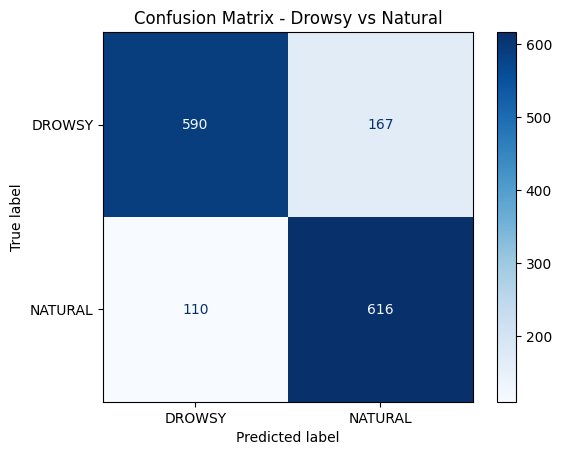

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=test_data.class_indices.keys())
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Drowsy vs Natural')
plt.show()


# 📝 Generate and Display Classification Report

In [24]:
from sklearn.metrics import classification_report

# Create the classification report using true and predicted labels
report= classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())


print("🔍 Classification Report:\n")
print(report)


🔍 Classification Report:

              precision    recall  f1-score   support

      DROWSY       0.84      0.78      0.81       757
     NATURAL       0.79      0.85      0.82       726

    accuracy                           0.81      1483
   macro avg       0.81      0.81      0.81      1483
weighted avg       0.82      0.81      0.81      1483

